# Object Detection


###1) Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### contents of drive

In [ ]:
!ls -l /content/drive/MyDrive/

total 8
drwx------ 2 root root 4096 May 24 18:44 'Colab Notebooks'
drwx------ 2 root root 4096 May 24 18:15  yolov4


In [3]:
import os, zipfile, shutil

####Unzip Zip files of Images

In [ ]:
dir_name = '/content/drive/MyDrive/Object Detection/'
output_dir = '/content/drive/MyDrive/yolov4/images/all_images'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(output_dir) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

####Move images to a single folder from multiple unziped folders

In [ ]:
import glob
import shutil
import os

folder_name = ['db1/', 'db2/', 'db3/', 'db4/', 'db5/', 'db6/', 'db7/', 'db8/', 'db9/', 'db10/']
src_dir = "/content/drive/MyDrive/yolov4/images/all_images"
dst_dir = "/content/drive/MyDrive/yolov4/images/all_images"
for path in folder_name:
  image_dir_path = base_path + '/' + path
  for jpgfile in glob.iglob(os.path.join(image_dir_path, "*.jpg")):
    shutil.move(jpgfile, dst_dir)

####Load image labels csv file

In [4]:
#load labels csv
import numpy as np
import pandas as pd

labels_csv = pd.read_csv('/content/drive/MyDrive/yolov4/images/WebMarket_coco_gt_object.csv')
labels_csv.head()

,image_name,x1,y1,x2,y2,class
0,db1.jpg,1105,919,1315,1127,object
1,db1.jpg,191,1242,398,1469,object
2,db1.jpg,1587,697,1906,761,object
3,db1.jpg,1541,442,1845,541,object
4,db1.jpg,1252,505,1398,761,object


####Check one bounding box coordinate

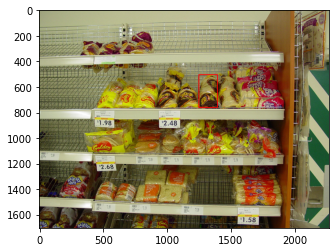

In [ ]:
from ast import literal_eval
import cv2
import matplotlib.pyplot as plt

fr = cv2.imread("/content/drive/MyDrive/yolov4/images/all_images/db1.jpg")
frame_rgb = cv2.cvtColor(fr, cv2.COLOR_BGR2RGB)
frame_rgb = cv2.rectangle(frame_rgb, (1252, 505), (1398, 761), (255, 0, 0), 5)
plt.imshow(frame_rgb)

####Convert x, y coordinates image labels to yolo image coordinates

In [5]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

####Function to append text in new line

In [6]:
def append_new_line(file_name, text_to_append):
    """Append given text as a new line at the end of file"""
    # Open the file in append & read mode ('a+')
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)

####Check image name from csv and get its height and weight and generate yolo coordinates

In [8]:
from PIL import Image
import glob, os
dst_dir = "/content/drive/MyDrive/yolov4/images/all_images/"
for index, row in labels_csv.iterrows():
  print(index)
  file_name = row['image_name'].split('.')[0] + '.txt'
  im=Image.open(os.path.join(dst_dir, row['image_name']))
  w= int(im.size[0])  
  h= int(im.size[1])
  box = (row['x1'],row['x2'],row['y1'],row['y2'])
  bb = convert((w,h), box)
  content = row['class']
  for tup in bb:
    content = content + " " + str(tup)
  if os.path.exists(os.path.join(dst_dir,file_name)):
    append_new_line(os.path.join(dst_dir,file_name), content)
  else:
    with open(os.path.join(dst_dir,file_name), 'w') as f:
      f.write(content)

Streaming output truncated to the last 5000 lines.
113388
113389
113390
113391
113392
113393
113394
113395
113396
113397
113398
113399
113400
113401
113402
113403
113404
113405
113406
113407
113408
113409
113410
113411
113412
113413
113414
113415
113416
113417
113418
113419
113420
113421
113422
113423
113424
113425
113426
113427
113428
113429
113430
113431
113432
113433
113434
113435
113436
113437
113438
113439
113440
113441
113442
113443
113444
113445
113446
113447
113448
113449
113450
113451
113452
113453
113454
113455
113456
113457
113458
113459
113460
113461
113462
113463
113464
113465
113466
113467
113468
113469
113470
113471
113472
113473
113474
113475
113476
113477
113478
113479
113480
113481
113482
113483
113484
113485
113486
113487
113488
113489
113490
113491
113492
113493
113494
113495
113496
113497
113498
113499
113500
113501
113502
113503
113504
113505
113506
113507
113508
113509
113510
113511
113512
113513
113514
113515
113516
113517
113518
113519
113520
113521
113522
1135

####Train, test and validation split

In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
txts =[]

#setup dir names
trainPath = '/content/drive/MyDrive/yolov4/images/train'
valPath = '/content/drive/MyDrive/yolov4/images/validation'
testPath = '/content/drive/MyDrive/yolov4/images/test'
crsPath = '/content/drive/MyDrive/yolov4/images/all_images' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
test_ratio = 0.1


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            txts.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForTest = int(len(imgs)*test_ratio)

#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileTxt = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainPath, fileJpg))
    shutil.move(os.path.join(crsPath, fileTxt), os.path.join(trainPath, fileTxt))

    #remove files from arrays
    imgs.remove(fileJpg)
    txts.remove(fileTxt)



#cycle for test dir   
for x in range(countForTest):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileTxt = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.move(os.path.join(crsPath, fileJpg), os.path.join(testPath, fileJpg))
    shutil.move(os.path.join(crsPath, fileTxt), os.path.join(testPath, fileTxt))

    #remove files from arrays
    imgs.remove(fileJpg)
    txts.remove(fileTxt)

#rest of files will be validation files, so rename origin dir to val dir
os.rename(crsPath, valPath)

#summary information after splitting
print('Total images: ', totalImgCount)
print('Images in train dir:', len(os.listdir(trainPath))/2)
print('Images in test dir:', len(os.listdir(testPath))/2)
print('Images in validation dir:', len(os.listdir(valPath))/2)

In [18]:
totalFileCount = len(os.listdir('/content/drive/MyDrive/yolov4/images/train'))/2
print(totalFileCount)

2993.0


In [21]:
totalTestFileCount = len(os.listdir('/content/drive/MyDrive/yolov4/images/test'))/2
print(totalTestFileCount)

79.0


In [22]:
totalValidationFileCount = len(os.listdir('/content/drive/MyDrive/yolov4/images/validation'))/2
print(totalValidationFileCount)

80.0
